In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore',category='FutureWarning')
#warnings.filterwarnings('ignore',category='DeprecationWarning')

In [30]:
train = pd.read_csv('dataset/hm_train.csv')


In [97]:
train1 = pd.read_csv('dataset/hm_train.csv')
train1.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [98]:
train1['predicted_category'].value_counts()

affection           20880
achievement         20274
bonding              6561
enjoy_the_moment     6508
leisure              4242
nature               1127
exercise              729
Name: predicted_category, dtype: int64

In [31]:
for i in train.columns:
    if train[i].isnull().any():
        print("True")
    else:
        print("False")
        

False
False
False
False
False


In [32]:
for i in train.columns:
    print(i,train[i].isnull().sum())
    

hmid 0
reflection_period 0
cleaned_hm 0
num_sentence 0
predicted_category 0


In [33]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [34]:
import re
def decontracted(text):
    # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t"," do not",text)
    text = re.sub(r"did\'t","did not",text)
    text = re.sub(r"haven\'t","have not",text)
    text = re.sub(r"wouldn\'t","would not",text)
    text = re.sub(r"couldn\'t","could not",text)
    text = re.sub(r"shouldn\'t","should not",text)
    text = re.sub(r"wasn\'t","was not",text)
    text = re.sub(r"weren\'t","were not",text)
    text = re.sub(r"hadn\t'","had not",text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [35]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'((www\.[S]+)|(https?://[\S]+))','URL',text)# replcae the website link to only "URL"
    text = re.sub(r'#','',text) # Removing hash(#) symbol .
    text = re.sub(r"$",'',text) # remove $ symbl
    text = re.sub(r',', '', text) # Removing comma symbol
    text = re.sub(r'\.\.+',' ',text) # Replacing two or more dot to single space
    text = re.sub(r'!+',' ',text) # Replacing single or more than one explanation symbol to single space
    text = re.sub(r'\*+',' ',text) # Replacing one or more star(*) symbol to single space
    text = re.sub(r';+',' ',text)   # Replacing  single semicolor(;)  or more semicolon(;) symbol to single space
    text = re.sub(r':+',' ',text)   # Replacing single colon(:) or more colon(:) sybol to single space
    text = re.sub(r"\'+",' ', text) # Replacing single quote or more single quote to single space
    text = re.sub(r'\"+',' ', text) # Replacing double quote or more double  quote to single space
    text = re.sub(r'\?+',' ', text) # Replacing single question mark or more question mark to single space
    text = re.sub(r'-+', ' ', text) # Replacing single hypen  symbol or more hypen symbol  to single space
    text = re.sub(r'_+','',text) # remove single underscore or more to single space
    text = re.sub(r'[\(\)]+',' ', text) # Replacing left paranthesis or right paraen
    #text = re.sub(r'[.' +']+','',text) # remove dot folwoed by space like this . . . . 
    text = re.sub(r' +',' ',text) # Replacing two or more white space to single white space
    text = re.sub(r'[@$]','',text) # remove special symbol such as @ $
    text = re.sub(r'[0-9]','',text) # remove numbers
    text = re.sub(r'[/]', ' ',text) # remove forward slash
    test = re.sub(r'[%]', ' ',text) # remove % symbol
    #text = re.sub(r'\b[a-z]','',text) # remove single a,b,c..... characters
    return text

In [36]:
train['cleaned_text'] = train['cleaned_hm'].map(decontracted)
train['cleaned_text'] = train['cleaned_text'].map(clean_text)

In [37]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,cleaned_text
0,27673,24h,I went on a successful date with someone I fel...,1,affection,i went on a successful date with someone i fel...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,i was happy when my son got % marks in his exa...
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,i went to the gym this morning and did yoga.
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,we had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,i went with grandchildren to butterfly display...


In [75]:
test = pd.read_csv("dataset/hm_test.csv")
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [76]:
test['cleaned_text'] = test['cleaned_hm'].map(decontracted)
test['cleaned_text'] = test['cleaned_text'].map(clean_text)

In [77]:
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence,cleaned_text
0,88305,3m,I spent the weekend in Chicago with my friends.,1,i spent the weekend in chicago with my friends.
1,88306,3m,We moved back into our house after a remodel. ...,2,we moved back into our house after a remodel. ...
2,88307,3m,My fiance proposed to me in front of my family...,1,my fiance proposed to me in front of my family...
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1,i ate lobster at a fancy restaurant with some ...
4,88309,3m,I went out to a nice restaurant on a date with...,5,i went out to a nice restaurant on a date with...


In [78]:
test.drop(['cleaned_hm'],axis=1,inplace=True)

In [79]:
test.head()

,hmid,reflection_period,num_sentence,cleaned_text
0,88305,3m,1,i spent the weekend in chicago with my friends.
1,88306,3m,2,we moved back into our house after a remodel. ...
2,88307,3m,1,my fiance proposed to me in front of my family...
3,88308,3m,1,i ate lobster at a fancy restaurant with some ...
4,88309,3m,5,i went out to a nice restaurant on a date with...


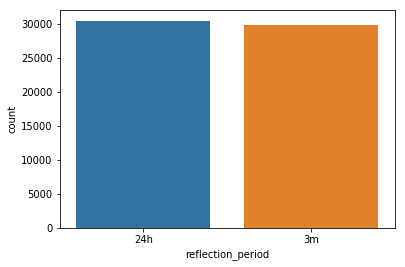

In [38]:
sns.countplot(x='reflection_period',data=train)
plt.show()


In [39]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [40]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category,cleaned_text
0,27673,24h,I went on a successful date with someone I fel...,1,affection,i went on a successful date with someone i fel...
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection,i was happy when my son got % marks in his exa...
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise,i went to the gym this morning and did yoga.
3,27676,24h,We had a serious talk with some friends of our...,2,bonding,we had a serious talk with some friends of our...
4,27677,24h,I went with grandchildren to butterfly display...,1,affection,i went with grandchildren to butterfly display...


In [41]:
train.drop(['hmid','cleaned_hm'],axis=1,inplace=True)


In [42]:
train.head()

,reflection_period,num_sentence,predicted_category,cleaned_text
0,24h,1,affection,i went on a successful date with someone i fel...
1,24h,1,affection,i was happy when my son got % marks in his exa...
2,24h,1,exercise,i went to the gym this morning and did yoga.
3,24h,2,bonding,we had a serious talk with some friends of our...
4,24h,1,affection,i went with grandchildren to butterfly display...


In [43]:
test = pd.read_csv('dataset/hm_test.csv')
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [44]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import preprocessing
rp_le = LabelEncoder()
# enc = preprocessing.OneHotEncoder()
# enc.fit(train['reflection_period'])
rp_ohe = rp_le.fit_transform(train['reflection_period'])
#rp_label = rp_ohe.fit_transform(train['reflection_period'].values.reshape(-1,1)).toarray()
train['Reflection_period_label'] = rp_ohe

In [45]:
pc = LabelEncoder()
pc_label = pc.fit_transform(train['predicted_category'])
train['predicted_category_label'] = pc_label

# enc_cl = preprocessing.OneHotEncoder()
# enc_cl.fit(train['predicted_category'])
# rp_ohe_cl = enc_cl.transform(train['predicted_category'])
# #rp_label = rp_ohe.fit_transform(train['reflection_period'].values.reshape(-1,1)).toarray()
# train['predicted_category_label'] = rp_ohe_cl

In [100]:
pc.classes_[i]
def d(i):
    if(i==0):
        return 'achievement'
df['target'] = df['target'].apply(d)

array(['achievement', 'affection', 'bonding', 'enjoy_the_moment',
       'exercise', 'leisure', 'nature'], dtype=object)

In [104]:
print(len(pc.classes_))

7


In [106]:
pc.transform(['achievement'])

array([0], dtype=int64)

In [107]:
pc.transform(['affection'])

array([1], dtype=int64)

In [82]:
rp_test_le = LabelEncoder()
# enc = preprocessing.OneHotEncoder()
# enc.fit(train['reflection_period'])
rp_test_ohe = rp_test_le.fit_transform(test['reflection_period'])
#rp_label = rp_ohe.fit_transform(train['reflection_period'].values.reshape(-1,1)).toarray()
test['Reflection_period_label'] = rp_test_ohe

In [85]:
test.drop(['reflection_period'],axis=1,inplace=True)

In [86]:
test.head()

,hmid,num_sentence,cleaned_text,Reflection_period_label
0,88305,1,i spent the weekend in chicago with my friends.,1
1,88306,2,we moved back into our house after a remodel. ...,1
2,88307,1,my fiance proposed to me in front of my family...,1
3,88308,1,i ate lobster at a fancy restaurant with some ...,1
4,88309,5,i went out to a nice restaurant on a date with...,1


In [46]:
train.head()

,reflection_period,num_sentence,predicted_category,cleaned_text,Reflection_period_label,predicted_category_label
0,24h,1,affection,i went on a successful date with someone i fel...,0,1
1,24h,1,affection,i was happy when my son got % marks in his exa...,0,1
2,24h,1,exercise,i went to the gym this morning and did yoga.,0,4
3,24h,2,bonding,we had a serious talk with some friends of our...,0,2
4,24h,1,affection,i went with grandchildren to butterfly display...,0,1


In [47]:
train.shape

(60321, 6)

In [48]:
train.drop(['reflection_period','predicted_category'],axis=1,inplace=True)

In [49]:
train.head()

,num_sentence,cleaned_text,Reflection_period_label,predicted_category_label
0,1,i went on a successful date with someone i fel...,0,1
1,1,i was happy when my son got % marks in his exa...,0,1
2,1,i went to the gym this morning and did yoga.,0,4
3,2,we had a serious talk with some friends of our...,0,2
4,1,i went with grandchildren to butterfly display...,0,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [51]:
# X = train.iloc[:,0:3]
# y = train.iloc[:,-1]

In [52]:
train['predicted_category_label'].value_counts()

1    20880
0    20274
2     6561
3     6508
5     4242
6     1127
4      729
Name: predicted_category_label, dtype: int64

In [53]:
# print(X_train.shape)
# print(X_test.shape)

In [54]:
# X_train,X_test,y_train, y_test = train_test_split(train['cleaned_text'].values,train['predicted_category_label'].values,stratify=train['predicted_category_label'].values,test_size=0.3)


In [55]:
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

(42224,) (42224,)
(18097,) (18097,)


In [87]:
clean_text_count = CountVectorizer(lowercase=True,stop_words=STOPWORDS)

text_train = clean_text_count.fit_transform(train['cleaned_text'])
text_test = clean_text_count.transform(test['cleaned_text'])



In [ ]:
# from scipy.sparse import hstack

# train_data_st = hstack((text_train,title_count_fit_train))

In [88]:
text_train = preprocessing.normalize(text_train)
text_test = preprocessing.normalize(text_test)

In [89]:
y_train = train['predicted_category_label']

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gscv = GridSearchCV(log_reg,param_grid,scoring='f1_weighted', cv=10,verbose=1,n_jobs=3) 
gscv.fit(text_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))



Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  7.2min
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 15.2min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 16.0min finished


Best HyperParameter:  {'C': 10, 'penalty': 'l2'}
Best Accuracy: 90.50%


In [93]:
lr = LogisticRegression(C=10,penalty='l2')
lr.fit(text_train,y_train)
y_pred =lr.predict(text_test)
# print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
# print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
# print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
# print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

In [94]:
y_pred

array([2, 0, 1, ..., 1, 2, 4], dtype=int64)

In [96]:
output = pd.DataFrame(data={"Index":test['hmid'],'predicted_category':(y_pred)}).to_csv('submission_lr.csv',index=False)

In [56]:
# gram = CountVectorizer(ngram_range=(1,1),lowercase=True,stop_words=STOPWORDS) 
# X_train = gram.fit_transform(X_train)

# X_train = preprocessing.normalize(X_train)
# print("Train Data Size: ",X_train.shape)
# X_test = gram.transform(X_test)

# X_test = preprocessing.normalize(X_test)
# print("Test Data Size: ",X_test.shape)

Train Data Size:  (42224, 17302)
Test Data Size:  (18097, 17302)


In [64]:
X_train_tfidf,X_test_tfidf,y_train_tfidf, y_test_tfidf = train_test_split(train['cleaned_text'].values,train['predicted_category_label'].values,stratify=train['predicted_category_label'].values,test_size=0.3)


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1,1),stop_words=STOPWORDS)
X_train_tfidf = tfidf_vect.fit_transform(X_train_tfidf)
X_train_tfidf = preprocessing.normalize(X_train_tfidf)
print("Train Data Size: ",X_train_tfidf.shape)


X_test_tfidf = tfidf_vect.transform(X_test_tfidf)
X_test_tfidf = preprocessing.normalize(X_test_tfidf)
print("Test Data Size: ",X_test_tfidf.shape)

Train Data Size:  (42224, 17441)
Test Data Size:  (18097, 17441)


### BernoulliNB() uni_gram

In [57]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
bnb = BernoulliNB()
parms = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
gscv = GridSearchCV(bnb,param_grid=parms,scoring='f1_weighted',n_jobs=-1,cv=10)
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Best HyperParameter:  {'alpha': 0.1}
Best Accuracy: 79.53%


In [58]:
bnb = BernoulliNB(alpha=0.1)
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

# cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

Accuracy on test data is 80.6211%
Precision on test set: 0.8069
Recall on test set: 0.8062
F1-Score on test set: 0.8038


In [59]:
# This function plots the confusion matrices given y_i, y_i_hat.
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,0,2,3,5,6,4]
    # representing C in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # representing B in heatmap format FOR PRECISION
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing A in heatmap format FOR RECALL
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


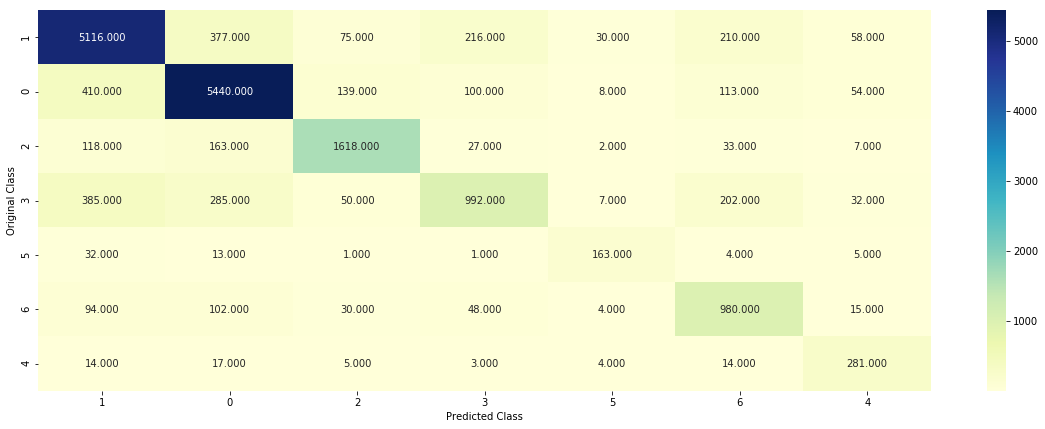

-------------------- Precision matrix (Columm Sum=1) --------------------


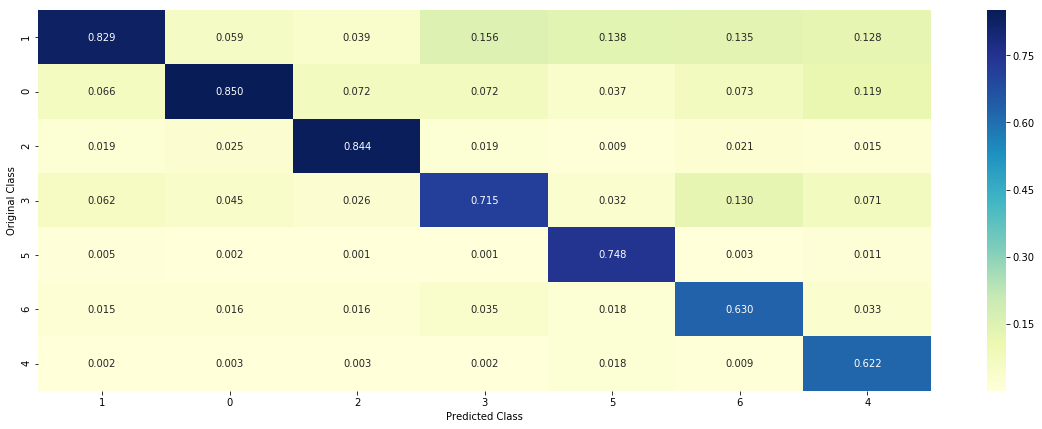

-------------------- Recall matrix (Row sum=1) --------------------


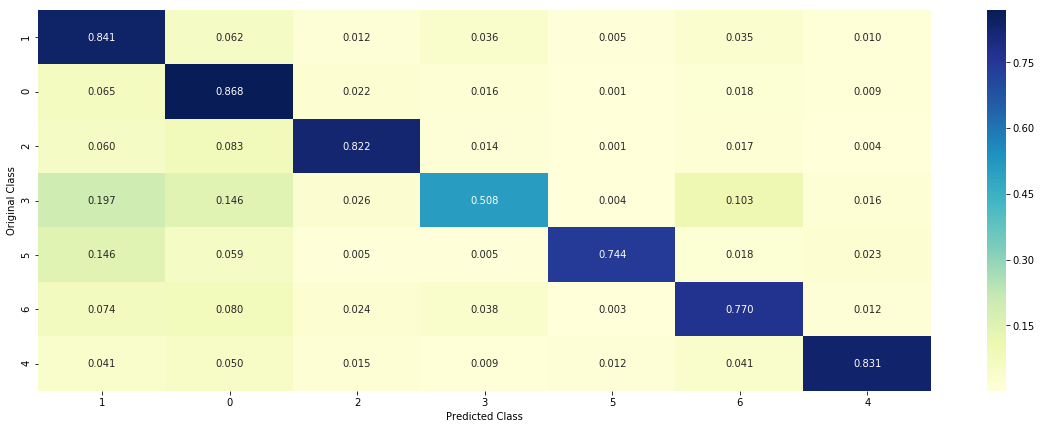

In [60]:
plot_confusion_matrix(y_test, y_pred)

### BernoulliNB() uni_gram tfidf

In [66]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
bnb = BernoulliNB()
parms = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
gscv = GridSearchCV(bnb,param_grid=parms,scoring='f1_weighted',n_jobs=-1,cv=10)
gscv.fit(X_train_tfidf,y_train_tfidf)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Best HyperParameter:  {'alpha': 0.1}
Best Accuracy: 79.54%


In [67]:
bnb = BernoulliNB(alpha=0.1)
bnb.fit(X_train_tfidf,y_train_tfidf)
y_pred_tfidf = bnb.predict(X_test_tfidf)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test_tfidf,y_pred_tfidf)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test_tfidf,y_pred_tfidf,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test_tfidf, y_pred_tfidf, average = 'weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test_tfidf, y_pred_tfidf, average = 'weighted')))

# cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

Accuracy on test data is 80.2840%
Precision on test set: 0.8038
Recall on test set: 0.8028
F1-Score on test set: 0.8003


-------------------- Confusion matrix --------------------


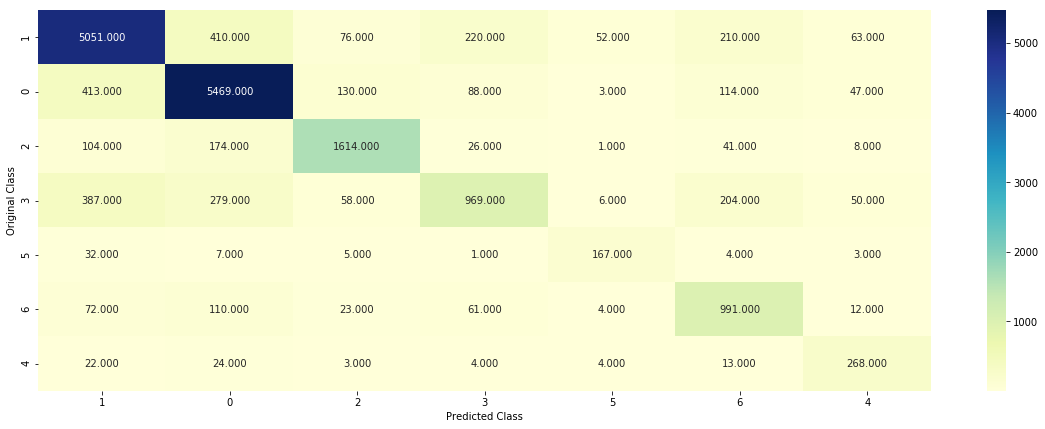

-------------------- Precision matrix (Columm Sum=1) --------------------


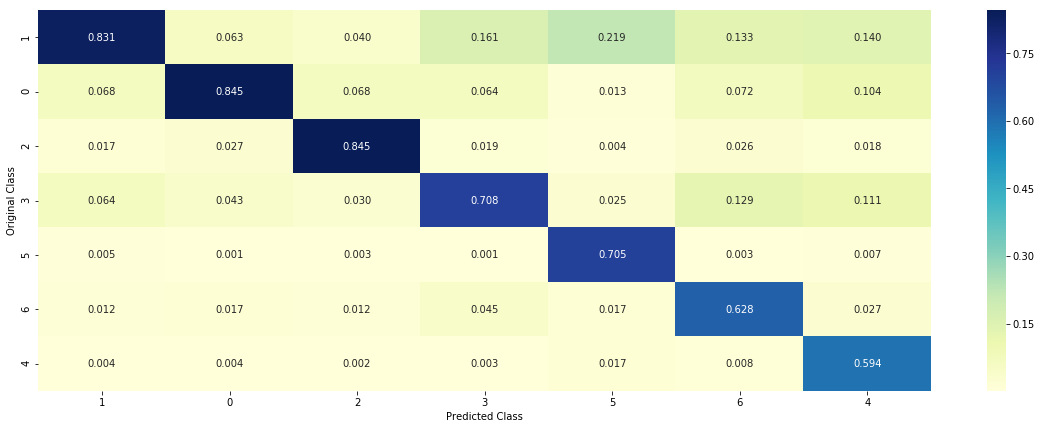

-------------------- Recall matrix (Row sum=1) --------------------


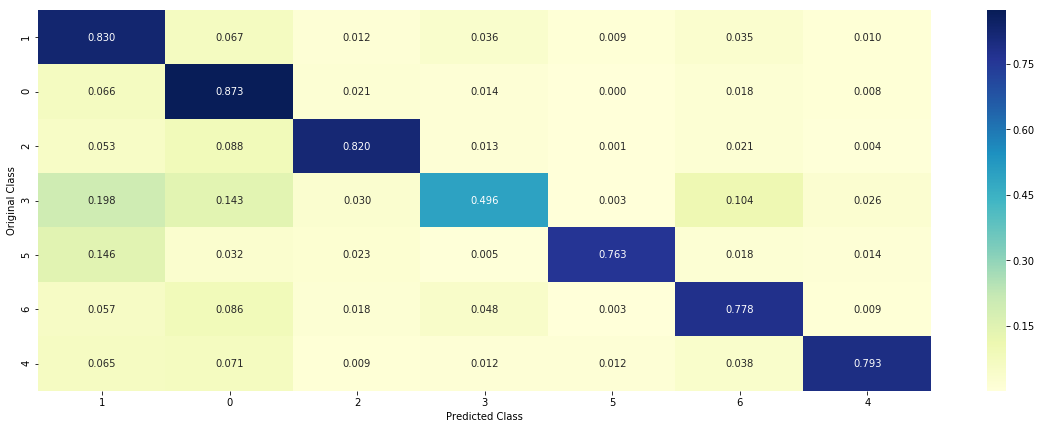

In [68]:
plot_confusion_matrix(y_test_tfidf,y_pred_tfidf)


###  MultinomaiNB  uni_gram

In [61]:
mnb = MultinomialNB()
parms = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
gscv = GridSearchCV(mnb,param_grid=parms,scoring='f1_weighted',n_jobs=-1,cv=10)
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Best HyperParameter:  {'alpha': 0.05}
Best Accuracy: 78.13%


In [62]:
mnb = BernoulliNB(alpha=0.05)
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

Accuracy on test data is 79.8751%
Precision on test set: 0.7998
Recall on test set: 0.7988
F1-Score on test set: 0.7965


-------------------- Confusion matrix --------------------


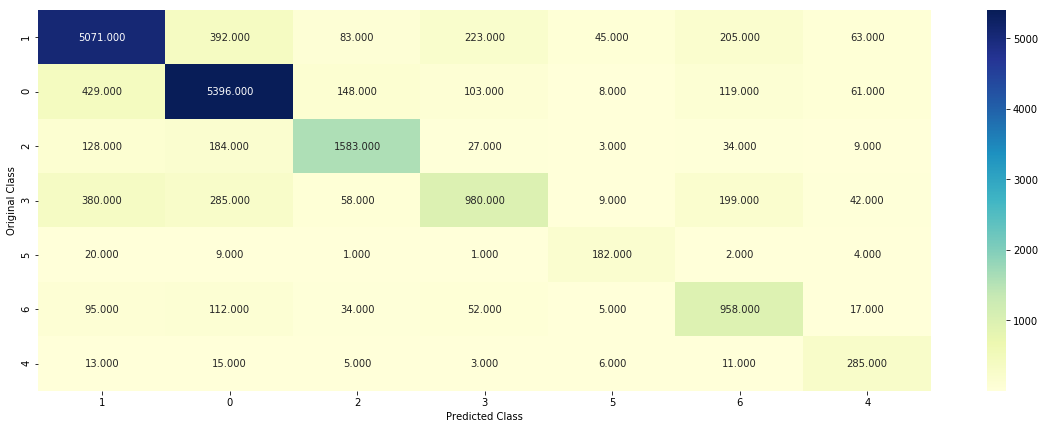

-------------------- Precision matrix (Columm Sum=1) --------------------


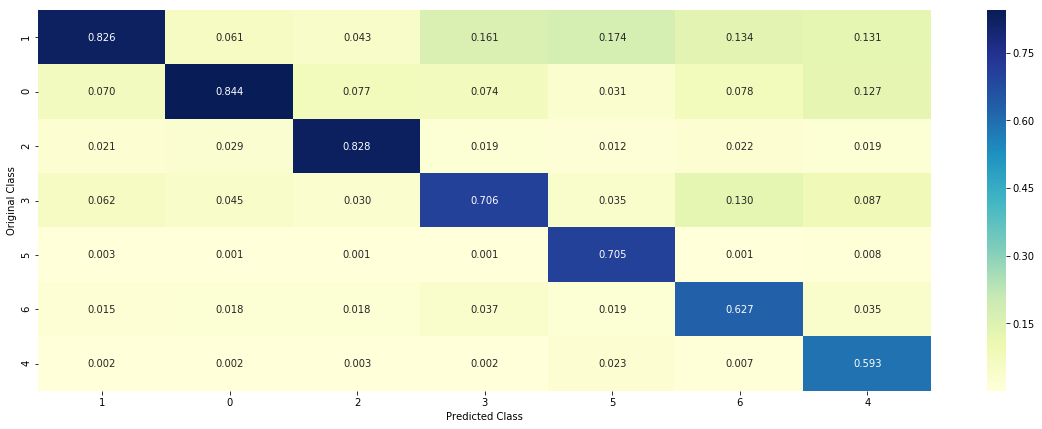

-------------------- Recall matrix (Row sum=1) --------------------


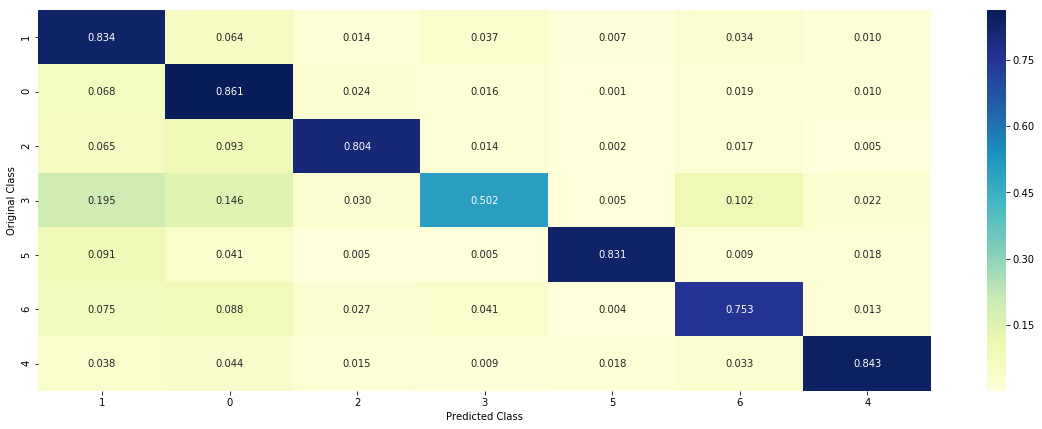

In [63]:
plot_confusion_matrix(y_test, y_pred)

### MultinomaiNB uni_gram tfidf

In [69]:
mnb = MultinomialNB()
parms = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
gscv = GridSearchCV(mnb,param_grid=parms,scoring='f1_weighted',n_jobs=-1,cv=10)
gscv.fit(X_train_tfidf,y_train_tfidf)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Best HyperParameter:  {'alpha': 0.05}
Best Accuracy: 75.85%


In [70]:
mnb = MultinomialNB(alpha=0.05)
mnb.fit(X_train_tfidf,y_train_tfidf)
y_pred_tfidf = mnb.predict(X_test_tfidf)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test_tfidf,y_pred_tfidf)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test_tfidf,y_pred_tfidf,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test_tfidf, y_pred_tfidf, average = 'weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test_tfidf, y_pred_tfidf, average = 'weighted')))

# cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

Accuracy on test data is 76.4878%
Precision on test set: 0.7680
Recall on test set: 0.7649
F1-Score on test set: 0.7567


### Logistic Regression uni_gram

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression(class_weight='balanced')
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gscv = RandomizedSearchCV(lr,param_grid,cv=10,scoring='f1_weighted',verbose=1,n_jobs=3) 
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  3.6min finished


Best HyperParameter:  {'penalty': 'l2', 'C': 100}
Best Accuracy: 90.01%


In [42]:
lr = LogisticRegression(C=100,penalty='l2',class_weight='balanced')
lr.fit(X_train,y_train)
y_pred =lr.predict(X_test)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

Accuracy on test data is 89.9707%
Precision on test set: 0.9006
Recall on test set: 0.8997
F1-Score on test set: 0.9000


-------------------- Confusion matrix --------------------


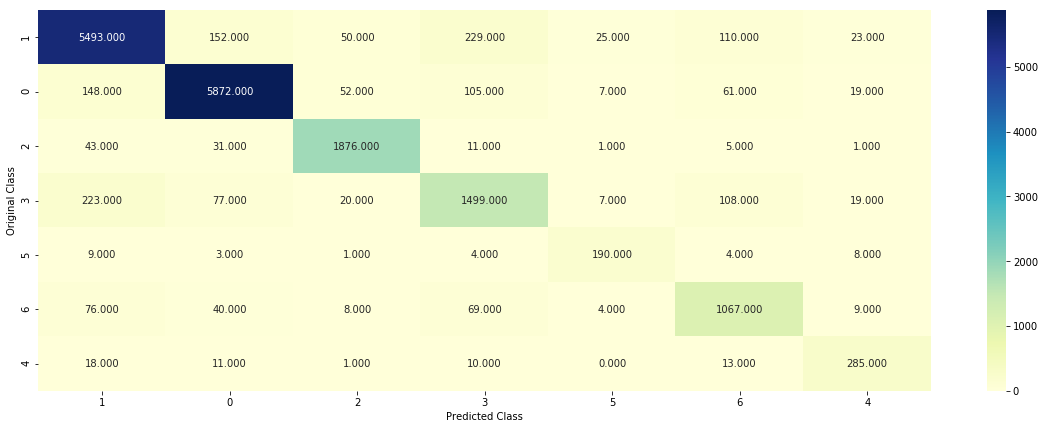

-------------------- Precision matrix (Columm Sum=1) --------------------


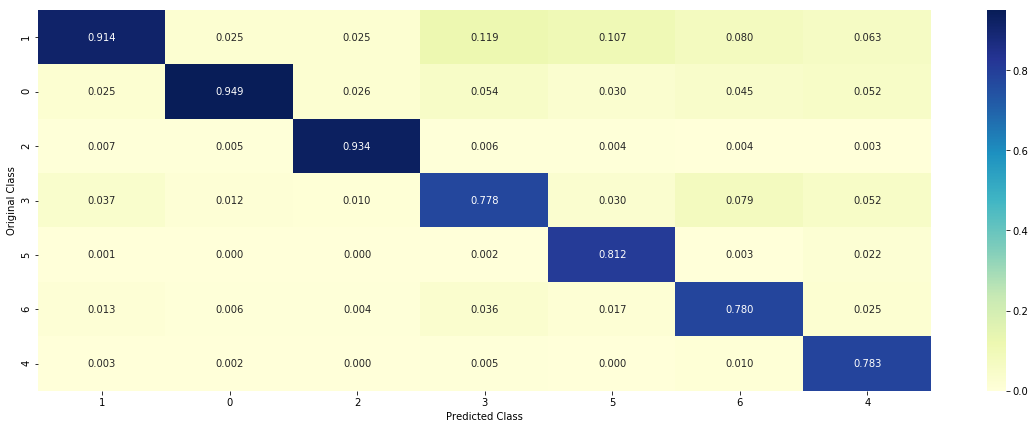

-------------------- Recall matrix (Row sum=1) --------------------


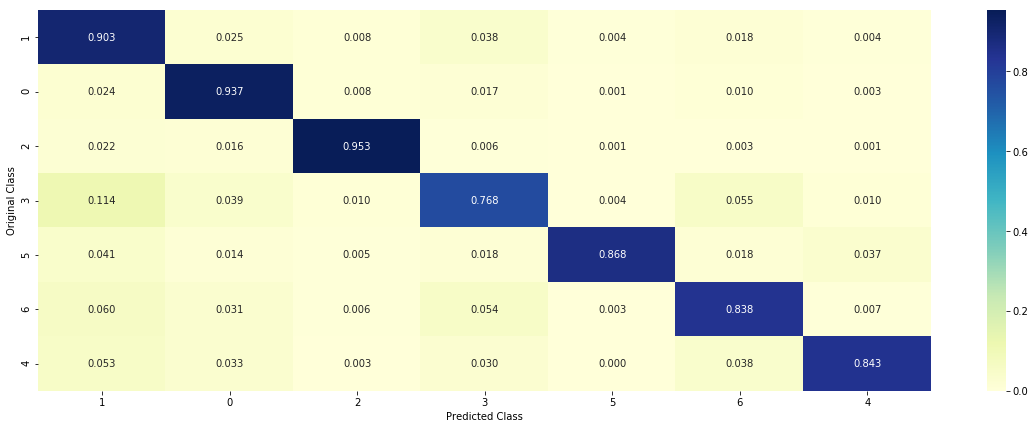

In [43]:
plot_confusion_matrix(y_test, y_pred)

### Logistic Regression uni_gram tfidf

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression(class_weight='balanced')
param_grid = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gscv = RandomizedSearchCV(lr,param_grid,cv=10,scoring='f1_weighted',verbose=1,n_jobs=3) 
# https://stackoverflow.com/questions/19018333/gridsearchcv-on-logisticregression-in-scikit-learn
gscv.fit(X_train_tfidf,y_train_tfidf)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  4.8min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  8.4min finished


Best HyperParameter:  {'penalty': 'l1', 'C': 5}
Best Accuracy: 89.70%


In [72]:
lr = LogisticRegression(C=5,penalty='l1',class_weight='balanced')
lr.fit(X_train_tfidf,y_train_tfidf)
y_pred_tfidf =lr.predict(X_test_tfidf)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test_tfidf,y_pred_tfidf)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test_tfidf,y_pred_tfidf,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test_tfidf, y_pred_tfidf, average = 'weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test_tfidf, y_pred_tfidf, average = 'weighted')))

Accuracy on test data is 89.8326%
Precision on test set: 0.9003
Recall on test set: 0.8983
F1-Score on test set: 0.8990


-------------------- Confusion matrix --------------------


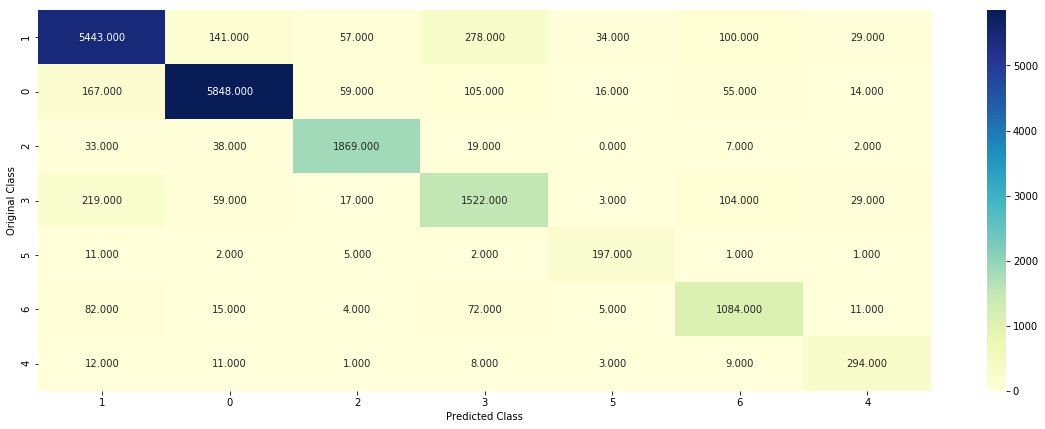

-------------------- Precision matrix (Columm Sum=1) --------------------


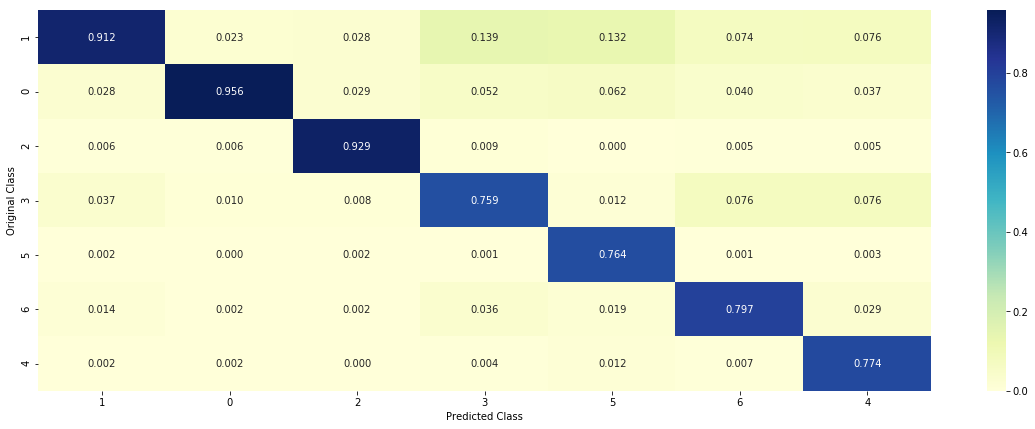

-------------------- Recall matrix (Row sum=1) --------------------


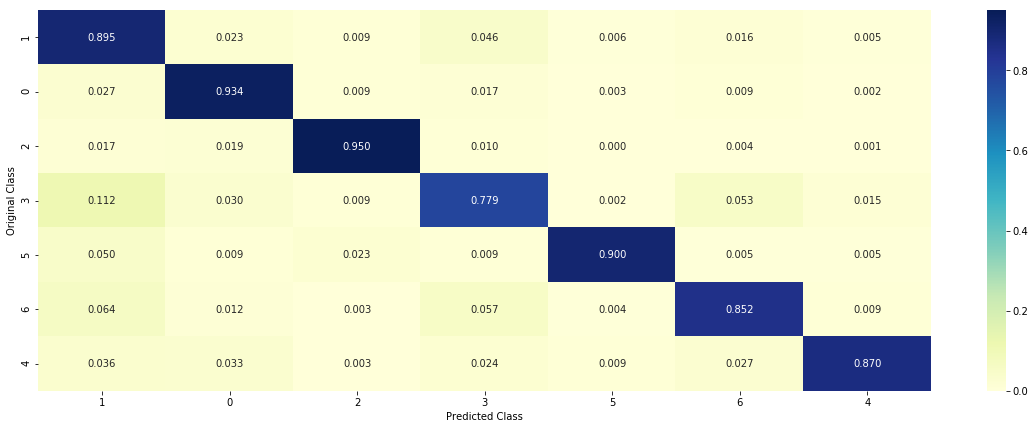

In [73]:
plot_confusion_matrix(y_test_tfidf,y_pred_tfidf)

### KNN

In [34]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# param= {'K':[1,3,5,7,9]}
# gscv = GridSearchCV(knn,param_grid=param,cv=10,scoring='f1_weighted',verbose=1,) 
# gscv.fit(X_train,y_train)
# print("Best HyperParameter: ",gscv.best_params_)
# print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

In [35]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# #define the model and parameters
# knn = KNeighborsClassifier()

# parameters = {'n_neighbors':[4,5,6,7],
#               'leaf_size':[1,3,5],
#               'algorithm':['auto', 'kd_tree'],
#               'n_jobs':[-1]}

# #Fit the model
# model = GridSearchCV(knn, param_grid=parameters)
# model.fit(train_X,train_y)

# #predictions on test data
# prediction=model.predict(test_X)

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
param = {'max_depth':[1,2,4,6,8,10,11,13,15]}
gscv = GridSearchCV(dt,cv=10,param_grid=param,scoring='f1_weighted',verbose=1,n_jobs=-1)
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.5s finished


Best HyperParameter:  {'max_depth': 15}
Best Accuracy: 61.21%


In [91]:
dt = DecisionTreeClassifier(max_depth=15)
dt.fit(X_train,y_train)
y_pred =dt.predict(X_test)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

Accuracy on test data is 64.9003%
Precision on test set: 0.7475
Recall on test set: 0.6490
F1-Score on test set: 0.6078


-------------------- Confusion matrix --------------------


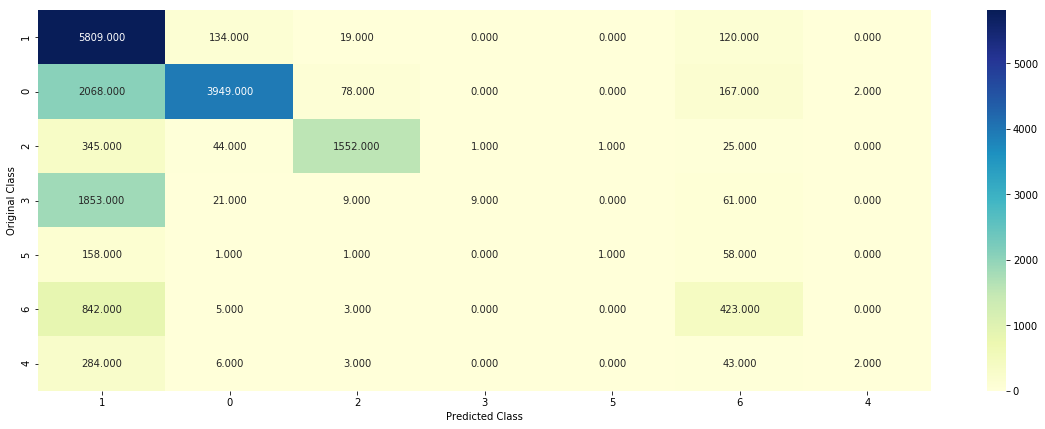

-------------------- Precision matrix (Columm Sum=1) --------------------


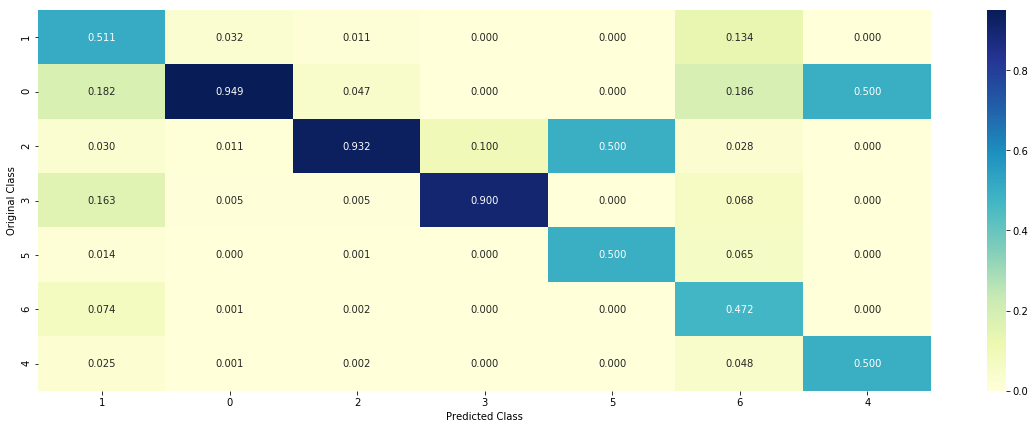

-------------------- Recall matrix (Row sum=1) --------------------


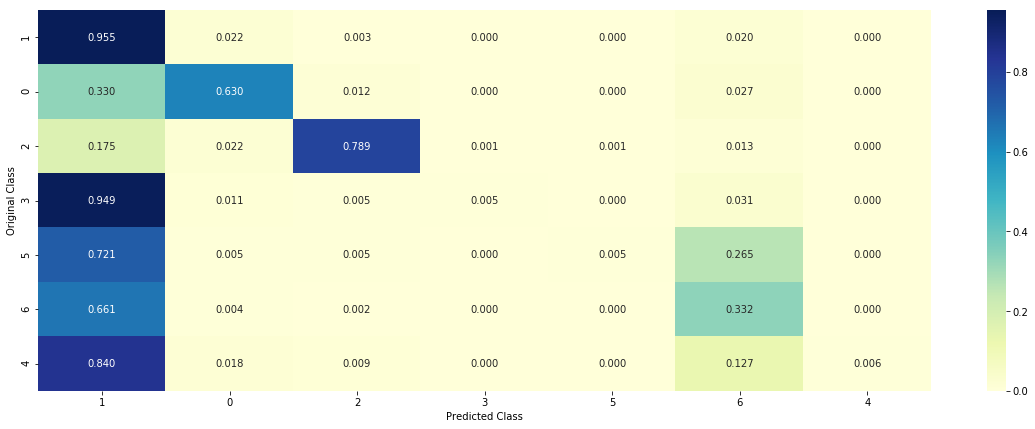

In [92]:
plot_confusion_matrix(y_test, y_pred)

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param = {'n_estimators':[20,40,60,80,100,120,140],'max_depth':[1,2,4,6,8,10,11,13,15]}
gscv = GridSearchCV(rf,cv=10,param_grid=param,scoring='f1_weighted',verbose=1,n_jobs=-1)
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 63 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 11.0min finished


Best HyperParameter:  {'max_depth': 15, 'n_estimators': 140}
Best Accuracy: 52.65%


In [94]:
rf = RandomForestClassifier(n_estimators=140, max_depth=15)
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

Accuracy on test data is 63.4249%
Precision on test set: 0.6493
Recall on test set: 0.6342
F1-Score on test set: 0.5189


-------------------- Confusion matrix --------------------


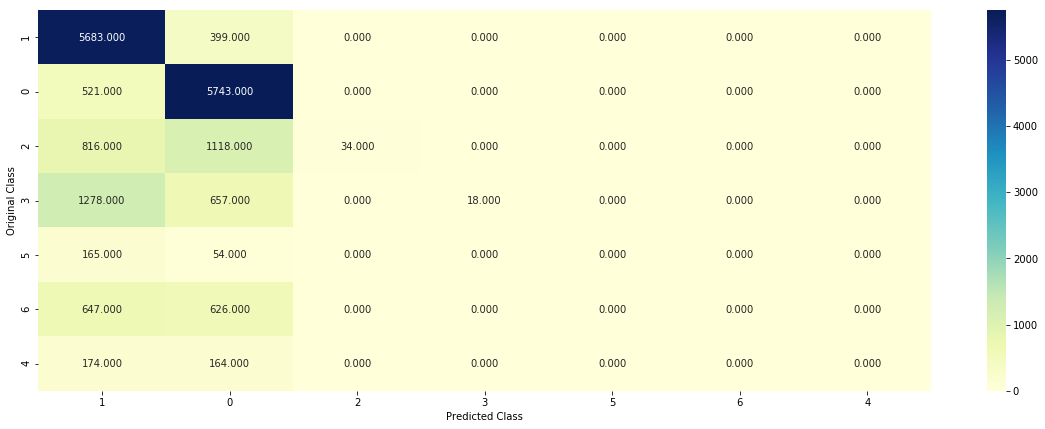

-------------------- Precision matrix (Columm Sum=1) --------------------


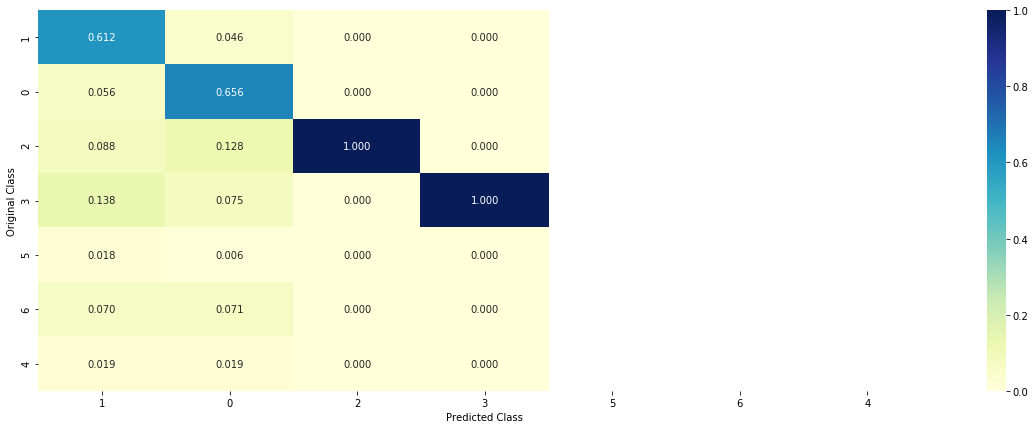

-------------------- Recall matrix (Row sum=1) --------------------


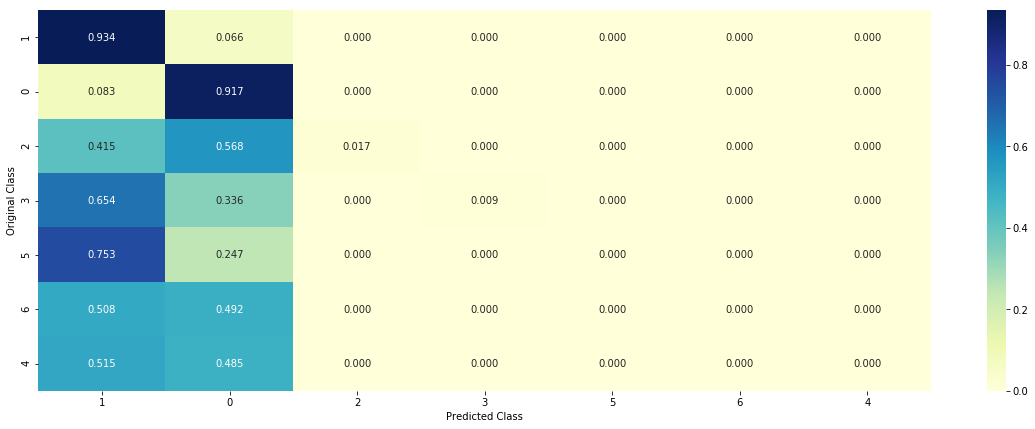

In [95]:
plot_confusion_matrix(y_test, y_pred)

### XGBoost 

In [96]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
base_lerner=list(range(1,50,9))
max_depth=[7, 5, 8, 10]
lr_rate=[0.0001, 0.01,0.1,0.005]
param = {'n_estimators':base_lerner, 'max_depth':max_depth, 'learning_rate':lr_rate} #params we need to try on classifier

gscv = GridSearchCV(xgb_clf,param_grid=param,cv=10,verbose=1,scoring='f1_weighted',n_jobs=-1)
gscv.fit(X_train,y_train)
print("Best HyperParameter: ",gscv.best_params_)
print("Best Accuracy: %.2f%%"%(gscv.best_score_*100))

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 66.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 124.1min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 154.2min finished


Best HyperParameter:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 46}
Best Accuracy: 79.02%


In [97]:
xgb_clf= xgb.XGBClassifier(learning_rate=0.1,max_depth=10,n_estimators=46)
xgb_clf.fit(X_train,y_train)
y_pred =xgb_clf.predict(X_test)
print("Accuracy on test data is %0.4f%%"%(accuracy_score(y_test,y_pred)*100))
print("Precision on test set: %0.4f"%(precision_score(y_test, y_pred,average='weighted')))
print("Recall on test set: %0.4f"%(recall_score(y_test, y_pred,average='weighted')))
print("F1-Score on test set: %0.4f"%(f1_score(y_test, y_pred,average='weighted')))

Accuracy on test data is 79.8088%
Precision on test set: 0.8156
Recall on test set: 0.7981
F1-Score on test set: 0.7893


-------------------- Confusion matrix --------------------


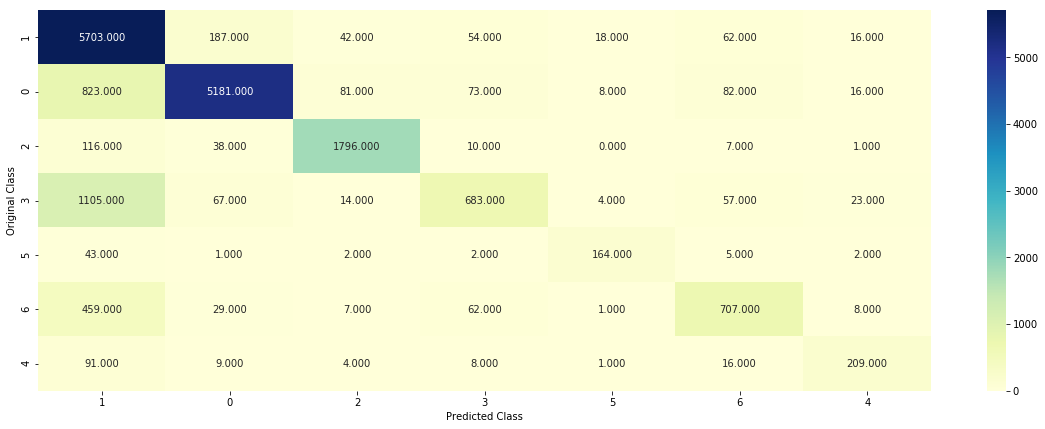

-------------------- Precision matrix (Columm Sum=1) --------------------


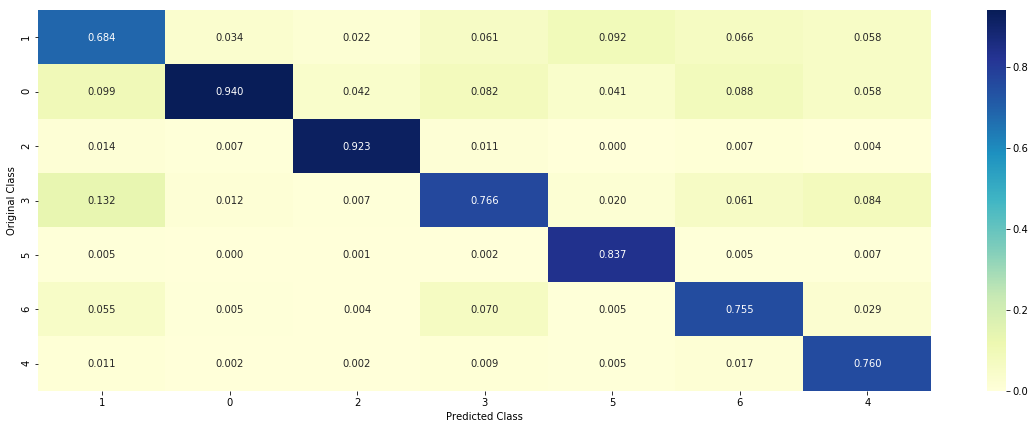

-------------------- Recall matrix (Row sum=1) --------------------


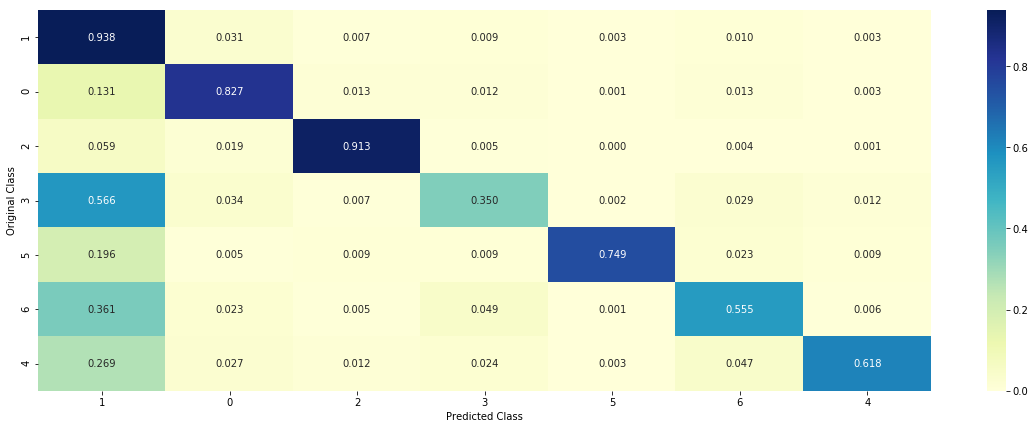

In [98]:
plot_confusion_matrix(y_test, y_pred)

In [56]:
submit = pd.read_csv("submission_lr.csv")
submit.head()

,Index,predicted_category
0,88305,2
1,88306,0
2,88307,1
3,88308,2
4,88309,1


In [59]:
label_0 = submit['predicted_category'][0]


In [60]:
label_0

2

In [61]:
type(label_0)

numpy.int64

In [62]:
def label_change(i):
    if i==0:
        return 'achievement'
    elif i==1:
        return 'affection'
    elif i== 2:
        return 'bonding'
    elif i==3:
        return 'enjoy_the_moment'
    elif i==4:
        return 'exercise'
    elif i==5:
        return 'leisure'
    elif i==6:
        return 'nature'
    

In [63]:
submit['predicted_category'] = submit['predicted_category'].map(label_change)

In [64]:
submit.head()

,Index,predicted_category
0,88305,bonding
1,88306,achievement
2,88307,affection
3,88308,bonding
4,88309,affection


In [65]:
output = pd.DataFrame(data={"hmid":submit['Index'],'predicted_category':submit['predicted_category']}).to_csv('submission_lr3.csv',index=False)

In [51]:
data1 = pd.read_csv('submitmission_lr1.csv')
data1.head()

,Index,predicted_category
0,88305,bonding
1,88306,achievement
2,88307,affection
3,88308,bonding
4,88309,affection


In [52]:
data1.rename(columns={"Index":"hmid"})


,hmid,predicted_category
0,88305,bonding
1,88306,achievement
2,88307,affection
3,88308,bonding
4,88309,affection
5,88310,leisure
6,88311,achievement
7,88312,affection
8,88313,leisure
9,88314,achievement


In [55]:
data1.to_csv('submission_lr2.csv',index=False)